In [55]:
path_lwf = '/home/karokaro/research-repositories/FACIL/results/fashionmnist_lwf_final_fashionmnist'

In [56]:
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(path_lwf) if isfile(join(path_lwf, f))]
onlyfiles

['stderr-2025-01-23-02-05.txt',
 'raw_log-2025-01-23-01-38.txt',
 'raw_log-2025-01-23-01-54.txt',
 'stdout-2025-01-23-01-38.txt',
 'stderr-2025-01-23-01-54.txt',
 'raw_log-2025-01-23-01-28.txt',
 'stderr-2025-01-23-01-10.txt',
 'stderr-2025-01-23-01-28.txt',
 'raw_log-2025-01-23-01-10.txt',
 'stdout-2025-01-23-02-05.txt',
 'stdout-2025-01-23-01-18.txt',
 'args-2025-01-23-01-18.txt',
 'args-2025-01-23-01-10.txt',
 'args-2025-01-23-02-17.txt',
 'stderr-2025-01-23-01-46.txt',
 'stdout-2025-01-23-01-54.txt',
 'args-2025-01-23-01-38.txt',
 'stdout-2025-01-23-01-28.txt',
 'args-2025-01-23-02-05.txt',
 'stdout-2025-01-23-01-46.txt',
 'args-2025-01-23-00-58.txt',
 'args-2025-01-23-01-28.txt',
 'stdout-2025-01-23-01-10.txt',
 'raw_log-2025-01-23-00-58.txt',
 'raw_log-2025-01-23-01-18.txt',
 'stderr-2025-01-23-01-18.txt',
 'stdout-2025-01-23-02-17.txt',
 'args-2025-01-23-01-46.txt',
 'raw_log-2025-01-23-01-46.txt',
 'args-2025-01-23-01-54.txt',
 'stderr-2025-01-23-00-58.txt',
 'raw_log-2025-01-2

In [57]:
args = [file for file in onlyfiles if 'args' in file ]
len(args)

9

In [58]:
import json
arg_dict = {}
for file in args:
    with open(join(path_lwf, file), 'r') as f:
        # regex time! we need only the timestamp of the file
        name = file.split('args-')[1]
        arg_dict[name] = json.loads(f.read())

In [59]:
import json

logs = [file for file in onlyfiles if 'raw_log' in file ]

res_dict = {}
for file in logs:
    with open(join(path_lwf, file), 'r') as f:
        name = file.split('raw_log-')[1]
        res_dict[name] = []
        for line in f:
            res_dict[name].append(json.loads(line.strip()))

In [60]:
import numpy as np
seeds = [0, 1, 2]
for seed in seeds:
    small = [key for key in arg_dict if arg_dict[key]["seed"]==seed]
    arg_means = {key:[np.mean([k["value"] for k in res_dict[key] if k["name"]=="acc_tag" and k["group"]=="test" and k["task"] == i]) for i in [4]] for key in small}
    max_key = max(arg_means, key=arg_means.get)
    small.remove(max_key)
    for key in small:
        res_dict.pop(key)
        arg_dict.pop(key)

In [61]:
import pandas as pd
import numpy as np
from itertools import chain
data = pd.DataFrame({'Approach': list(chain.from_iterable([['LWF' for i in range(5)] for key in res_dict.keys()])),
                     'Task': list(chain.from_iterable([[i for i in range(5)] for key in res_dict.keys()])),
                     'Average Accuracy': list(chain.from_iterable([[np.mean([k["value"] for k in res_dict[key] if k["name"]=="acc_tag" and k["group"]=="test" and k["task"] == i]) for i in range(5)] for key in res_dict.keys()])),
                     'Average Forgetting': list(chain.from_iterable([[np.mean([k["value"] for k in res_dict[key] if k["name"]=="forg_tag" and k["group"]=="test" and k["task"] == i and k["iter"] != k["task"]]) for i in range(5)] for key in res_dict.keys()]))})

/home/karokaro/research-repositories/FACIL/venv/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/karokaro/research-repositories/FACIL/venv/lib/python3.11/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


/tmp/ipykernel_35340/1207693049.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot( data,  x='Task', y='Average Accuracy', ci=None)


<Axes: xlabel='Task', ylabel='Average Accuracy'>

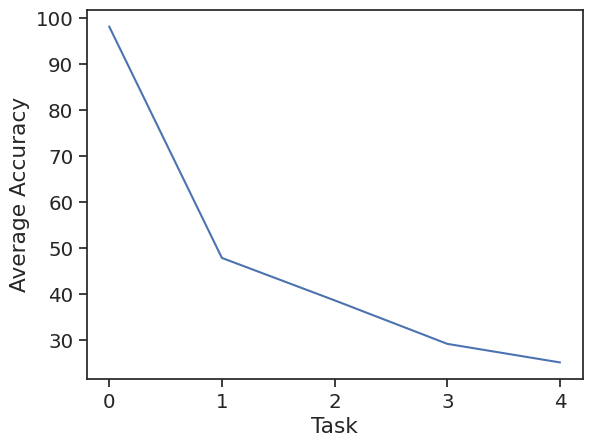

In [62]:
import seaborn as sns
sns.lineplot( data,  x='Task', y='Average Accuracy', ci=None)

In [63]:
data.groupby(['Approach', 'Task']).mean().apply(lambda x: round(x, 2))

Average Accuracy  Average Forgetting
Approach Task                                      
LWF      0                98.23                 NaN
         1                47.90               98.23
         2                38.67               88.90
         3                29.21               92.31
         4                25.17               91.88

In [64]:
path_ewc = '/home/karokaro/research-repositories/FACIL/results/fashionmnist_ewc_final_fashionmnist'

In [65]:
onlyfiles = [f for f in listdir(path_ewc) if isfile(join(path_ewc, f))]
args = [file for file in onlyfiles if 'args' in file ]
len(args)

9

In [66]:
import json
arg_dict = {}
for file in args:
    with open(join(path_ewc, file), 'r') as f:
        # regex time! we need only the timestamp of the file
        name = file.split('args-')[1]
        arg_dict[name] = json.loads(f.read())

In [67]:
import json

logs = [file for file in onlyfiles if 'raw_log' in file ]

res_dict = {}
for file in logs:
    with open(join(path_ewc, file), 'r') as f:
        name = file.split('raw_log-')[1]
        res_dict[name] = []
        for line in f:
            res_dict[name].append(json.loads(line.strip()))

In [68]:
import numpy as np
seeds = [0, 1, 2]
for seed in seeds:
    small = [key for key in arg_dict if arg_dict[key]["seed"]==seed]
    arg_means = {key:[np.mean([k["value"] for k in res_dict[key] if k["name"]=="acc_tag" and k["group"]=="test" and k["task"] == i]) for i in [4]] for key in small}
    max_key = max(arg_means, key=arg_means.get)
    small.remove(max_key)
    for key in small:
        res_dict.pop(key)
        arg_dict.pop(key)

In [69]:
data_ewc = pd.DataFrame({'Approach': list(chain.from_iterable([['EWC' for i in range(5)] for key in res_dict.keys()])),
                     'Task': list(chain.from_iterable([[i for i in range(5)] for key in res_dict.keys()])),
                     'Average Accuracy': list(chain.from_iterable([[np.mean([k["value"] for k in res_dict[key] if k["name"]=="acc_tag" and k["group"]=="test" and k["task"] == i]) for i in range(5)] for key in res_dict.keys()])),
                     'Average Forgetting': list(chain.from_iterable([[np.mean([k["value"] for k in res_dict[key] if k["name"]=="forg_tag" and k["group"]=="test" and k["task"] == i and k["iter"] != k["task"]]) for i in range(5)] for key in res_dict.keys()]))})

/home/karokaro/research-repositories/FACIL/venv/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/karokaro/research-repositories/FACIL/venv/lib/python3.11/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


<Axes: xlabel='Task', ylabel='Average Accuracy'>

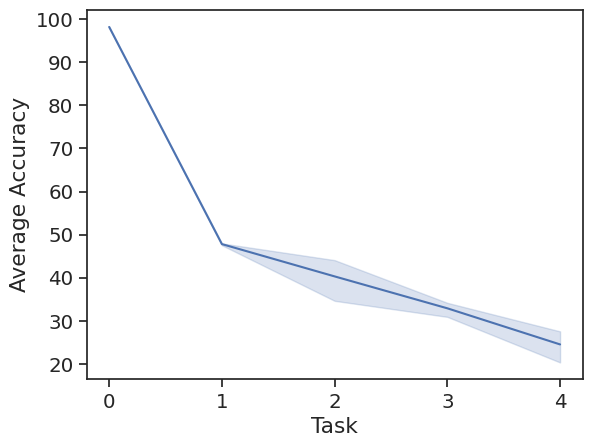

In [70]:
sns.lineplot( data_ewc,  x='Task', y='Average Accuracy')

In [71]:
data_ewc.groupby(['Approach', 'Task']).mean().apply(lambda x: round(x, 2))

Average Accuracy  Average Forgetting
Approach Task                                      
EWC      0                98.23                 NaN
         1                47.79               98.23
         2                40.29               86.36
         3                32.88               87.34
         4                24.49               92.68

In [72]:
path_lwm = '/home/karokaro/research-repositories/FACIL/results/fashionmnist_lwm_final_fashionmnist'

In [73]:
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(path_lwm) if isfile(join(path_lwm, f))]
onlyfiles

['raw_log-2025-01-24-08-22.txt',
 'stderr-2025-01-24-08-52.txt',
 'stderr-2025-01-24-08-22.txt',
 'stderr-2025-01-24-08-09.txt',
 'stdout-2025-01-24-08-29.txt',
 'raw_log-2025-01-24-08-29.txt',
 'args-2025-01-24-08-02.txt',
 'stdout-2025-01-24-08-22.txt',
 'args-2025-01-24-08-39.txt',
 'args-2025-01-24-08-09.txt',
 'raw_log-2025-01-24-08-59.txt',
 'stdout-2025-01-24-08-59.txt',
 'raw_log-2025-01-24-08-09.txt',
 'stderr-2025-01-24-08-45.txt',
 'args-2025-01-24-08-15.txt',
 'args-2025-01-24-08-52.txt',
 'args-2025-01-24-08-29.txt',
 'stderr-2025-01-24-08-59.txt',
 'raw_log-2025-01-24-08-39.txt',
 'stdout-2025-01-24-08-02.txt',
 'stderr-2025-01-24-08-29.txt',
 'args-2025-01-24-08-45.txt',
 'stderr-2025-01-24-08-15.txt',
 'stdout-2025-01-24-08-39.txt',
 'args-2025-01-24-08-22.txt',
 'stdout-2025-01-24-08-45.txt',
 'args-2025-01-24-08-59.txt',
 'raw_log-2025-01-24-08-15.txt',
 'stderr-2025-01-24-08-39.txt',
 'raw_log-2025-01-24-08-52.txt',
 'raw_log-2025-01-24-08-45.txt',
 'stdout-2025-01-2

In [74]:
args = [file for file in onlyfiles if 'args' in file ]
len(args)

9

In [75]:
import json
arg_dict = {}
for file in args:
    with open(join(path_lwm, file), 'r') as f:
        # regex time! we need only the timestamp of the file
        name = file.split('args-')[1]
        arg_dict[name] = json.loads(f.read())

In [76]:
import json

logs = [file for file in onlyfiles if 'raw_log' in file ]

res_dict = {}
for file in logs:
    with open(join(path_lwm, file), 'r') as f:
        name = file.split('raw_log-')[1]
        res_dict[name] = []
        for line in f:
            res_dict[name].append(json.loads(line.strip()))

In [77]:
import numpy as np
seeds = [0, 1, 2]
for seed in seeds:
    small = [key for key in arg_dict if arg_dict[key]["seed"]==seed]
    arg_means = {key:[np.mean([k["value"] for k in res_dict[key] if k["name"]=="acc_tag" and k["group"]=="test" and k["task"] == i]) for i in [4]] for key in small}
    max_key = max(arg_means, key=arg_means.get)
    small.remove(max_key)
    for key in small:
        res_dict.pop(key)
        arg_dict.pop(key)

In [78]:
import pandas as pd
import numpy as np
from itertools import chain
data_lwm = pd.DataFrame({'Approach': list(chain.from_iterable([['LWM' for i in range(5)] for key in res_dict.keys()])),
                     'Task': list(chain.from_iterable([[i for i in range(5)] for key in res_dict.keys()])),
                     'Average Accuracy': list(chain.from_iterable([[np.mean([k["value"] for k in res_dict[key] if k["name"]=="acc_tag" and k["group"]=="test" and k["task"] == i]) for i in range(5)] for key in res_dict.keys()])),
                     'Average Forgetting': list(chain.from_iterable([[np.mean([k["value"] for k in res_dict[key] if k["name"]=="forg_tag" and k["group"]=="test" and k["task"] == i and k["iter"] != k["task"]]) for i in range(5)] for key in res_dict.keys()]))})

/home/karokaro/research-repositories/FACIL/venv/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/karokaro/research-repositories/FACIL/venv/lib/python3.11/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


<Axes: xlabel='Task', ylabel='Average Accuracy'>

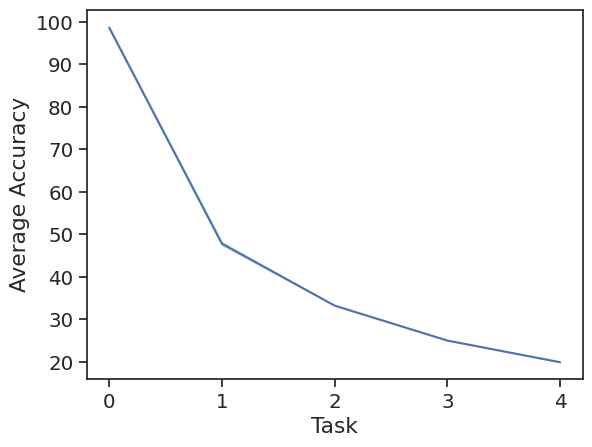

In [79]:
sns.lineplot( data_lwm,  x='Task', y='Average Accuracy')

In [80]:
data_lwm.groupby(['Approach', 'Task']).mean().apply(lambda x: round(x, 2))

Average Accuracy  Average Forgetting
Approach Task                                      
LWM      0                98.62                 NaN
         1                47.77               98.62
         2                33.20               97.08
         3                24.98               97.92
         4                19.88               98.42

In [81]:
path_icarl = '/home/karokaro/research-repositories/FACIL/results/fashionmnist_icarl_final_fashionmnist'

In [82]:
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(path_icarl) if isfile(join(path_icarl, f))]
onlyfiles

['args-2025-01-22-08-12.txt',
 'raw_log-2025-01-22-08-40.txt',
 'args-2025-01-22-08-40.txt',
 'args-2025-01-22-07-16.txt',
 'raw_log-2025-01-22-07-16.txt',
 'raw_log-2025-01-22-08-26.txt',
 'stderr-2025-01-22-08-56.txt',
 'stdout-2025-01-22-07-43.txt',
 'args-2025-01-22-07-29.txt',
 'args-2025-01-22-09-11.txt',
 'args-2025-01-22-08-26.txt',
 'args-2025-01-22-07-43.txt',
 'stdout-2025-01-22-07-57.txt',
 'raw_log-2025-01-22-08-12.txt',
 'stderr-2025-01-22-08-40.txt',
 'stdout-2025-01-22-08-56.txt',
 'stdout-2025-01-22-08-12.txt',
 'args-2025-01-22-08-56.txt',
 'raw_log-2025-01-22-07-57.txt',
 'raw_log-2025-01-22-07-43.txt',
 'stdout-2025-01-22-07-29.txt',
 'stderr-2025-01-22-08-12.txt',
 'raw_log-2025-01-22-07-29.txt',
 'stderr-2025-01-22-07-57.txt',
 'stderr-2025-01-22-07-43.txt',
 'stderr-2025-01-22-08-26.txt',
 'stdout-2025-01-22-08-26.txt',
 'stdout-2025-01-22-09-11.txt',
 'stderr-2025-01-22-07-16.txt',
 'stderr-2025-01-22-09-11.txt',
 'stdout-2025-01-22-07-16.txt',
 'args-2025-01-22

In [83]:
args = [file for file in onlyfiles if 'args' in file ]
len(args)

9

In [84]:
import json
arg_dict = {}
for file in args:
    with open(join(path_icarl, file), 'r') as f:
        # regex time! we need only the timestamp of the file
        name = file.split('args-')[1]
        arg_dict[name] = json.loads(f.read())

In [85]:
import json

logs = [file for file in onlyfiles if 'raw_log' in file ]

res_dict = {}
for file in logs:
    with open(join(path_icarl, file), 'r') as f:
        name = file.split('raw_log-')[1]
        res_dict[name] = []
        for line in f:
            res_dict[name].append(json.loads(line.strip()))

In [86]:
import numpy as np
seeds = [0, 1, 2]
for seed in seeds:
    small = [key for key in arg_dict if arg_dict[key]["seed"]==seed]
    arg_means = {key:[np.mean([k["value"] for k in res_dict[key] if k["name"]=="acc_tag" and k["group"]=="test" and k["task"] == i]) for i in [4]] for key in small}
    max_key = max(arg_means, key=arg_means.get)
    small.remove(max_key)
    for key in small:
        res_dict.pop(key)
        arg_dict.pop(key)

In [87]:
import pandas as pd
import numpy as np
from itertools import chain
data_icarl = pd.DataFrame({'Approach': list(chain.from_iterable([['iCaRL' for i in range(5)] for key in res_dict.keys()])),
                     'Task': list(chain.from_iterable([[i for i in range(5)] for key in res_dict.keys()])),
                     'Average Accuracy': list(chain.from_iterable([[np.mean([k["value"] for k in res_dict[key] if k["name"]=="acc_tag" and k["group"]=="test" and k["task"] == i]) for i in range(5)] for key in res_dict.keys()])),
                     'Average Forgetting': list(chain.from_iterable([[np.mean([k["value"] for k in res_dict[key] if k["name"]=="forg_tag" and k["group"]=="test" and k["task"] == i and k["iter"] != k["task"]]) for i in range(5)] for key in res_dict.keys()]))})

/home/karokaro/research-repositories/FACIL/venv/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/karokaro/research-repositories/FACIL/venv/lib/python3.11/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [88]:
data_icarl.groupby(['Approach', 'Task']).mean().apply(lambda x: round(x, 2))

Average Accuracy  Average Forgetting
Approach Task                                      
iCaRL    0                98.77                 NaN
         1                83.49                9.18
         2                76.07               14.58
         3                65.13               17.50
         4                64.04               19.45

In [89]:
path_rere = '/home/karokaro/research-repositories/FACIL/results/fashionmnist_rere_lrp_final_fashionmnist'

In [90]:
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(path_rere) if isfile(join(path_rere, f))]
onlyfiles

['raw_log-2025-01-22-18-29.txt',
 'raw_log-2025-01-22-09-27.txt',
 'stdout-2025-01-22-20-13.txt',
 'args-2025-01-22-21-59.txt',
 'stderr-2025-01-22-17-06.txt',
 'stdout-2025-01-22-12-27.txt',
 'stderr-2025-01-22-21-59.txt',
 'stdout-2025-01-22-21-59.txt',
 'stdout-2025-01-22-11-01.txt',
 'raw_log-2025-01-22-11-01.txt',
 'stdout-2025-01-22-18-29.txt',
 'stderr-2025-01-22-11-01.txt',
 'raw_log-2025-01-22-15-33.txt',
 'args-2025-01-22-17-06.txt',
 'stderr-2025-01-22-13-58.txt',
 'stderr-2025-01-22-20-13.txt',
 'raw_log-2025-01-22-13-58.txt',
 'stdout-2025-01-22-17-06.txt',
 'stdout-2025-01-22-09-27.txt',
 'args-2025-01-22-15-33.txt',
 'stderr-2025-01-22-15-33.txt',
 'args-2025-01-22-11-01.txt',
 'args-2025-01-22-09-27.txt',
 'stdout-2025-01-22-15-33.txt',
 'raw_log-2025-01-22-12-27.txt',
 'stderr-2025-01-22-09-27.txt',
 'args-2025-01-22-12-27.txt',
 'raw_log-2025-01-22-21-59.txt',
 'args-2025-01-22-20-13.txt',
 'args-2025-01-22-18-29.txt',
 'stderr-2025-01-22-18-29.txt',
 'raw_log-2025-01

In [91]:
args = [file for file in onlyfiles if 'args' in file ]
len(args)

9

In [92]:
import json
arg_dict = {}
for file in args:
    with open(join(path_rere, file), 'r') as f:
        # regex time! we need only the timestamp of the file
        name = file.split('args-')[1]
        arg_dict[name] = json.loads(f.read())

In [93]:
import json

logs = [file for file in onlyfiles if 'raw_log' in file ]

res_dict = {}
for file in logs:
    with open(join(path_rere, file), 'r') as f:
        name = file.split('raw_log-')[1]
        res_dict[name] = []
        for line in f:
            res_dict[name].append(json.loads(line.strip()))

In [94]:
import numpy as np
seeds = [0, 1, 2]
for seed in seeds:
    small = [key for key in arg_dict if arg_dict[key]["seed"]==seed]
    arg_means = {key:[np.mean([k["value"] for k in res_dict[key] if k["name"]=="acc_tag" and k["group"]=="test" and k["task"] == i]) for i in [4]] for key in small}
    max_key = max(arg_means, key=arg_means.get)
    small.remove(max_key)
    for key in small:
        res_dict.pop(key)
        arg_dict.pop(key)

In [95]:
data_rere = pd.DataFrame({'Approach': list(chain.from_iterable([['ReReLRP' for i in range(5)] for key in res_dict.keys()])),
                     'Task': list(chain.from_iterable([[i for i in range(5)] for key in res_dict.keys()])),
                     'Average Accuracy': list(chain.from_iterable([[np.mean([k["value"] for k in res_dict[key] if k["name"]=="acc_tag" and k["group"]=="test" and k["task"] == i]) for i in range(5)] for key in res_dict.keys()])),
                     'Average Forgetting': list(chain.from_iterable([[np.mean([k["value"] for k in res_dict[key] if k["name"]=="forg_tag" and k["group"]=="test" and k["task"] == i and k["iter"] != k["task"]]) for i in range(5)] for key in res_dict.keys()]))})

/home/karokaro/research-repositories/FACIL/venv/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/karokaro/research-repositories/FACIL/venv/lib/python3.11/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


<Axes: xlabel='Task', ylabel='Average Accuracy'>

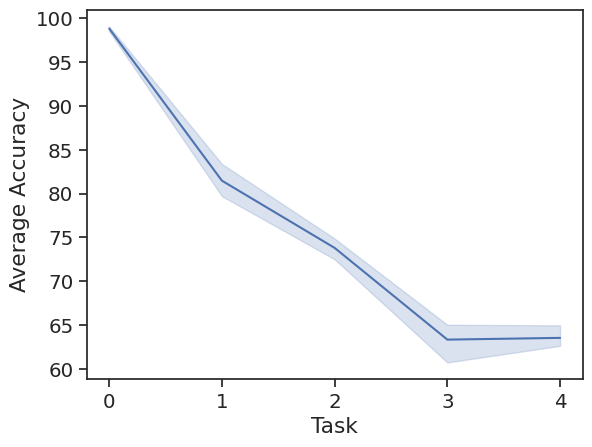

In [96]:
sns.lineplot( data_rere,  x='Task', y='Average Accuracy')

In [97]:
data_rere.groupby(['Approach', 'Task']).mean().apply(lambda x: round(x, 2))

Average Accuracy  Average Forgetting
Approach Task                                      
ReReLRP  0                98.82                 NaN
         1                81.47               14.82
         2                73.80               16.52
         3                63.34               17.43
         4                63.54               14.94

In [98]:
path_lwm = '/home/karokaro/research-repositories/FACIL/results/fashionmnist_joint_final_fashionmnist'

In [99]:
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(path_lwm) if isfile(join(path_lwm, f))]
onlyfiles

['raw_log-2025-01-20-08-50.txt',
 'stderr-2025-01-20-10-00.txt',
 'stderr-2025-01-20-09-44.txt',
 'stdout-2025-01-20-08-36.txt',
 'stdout-2025-01-20-09-14.txt',
 'stdout-2025-01-20-08-50.txt',
 'stderr-2025-01-20-10-38.txt',
 'stdout-2025-01-20-10-38.txt',
 'args-2025-01-20-09-44.txt',
 'stderr-2025-01-20-08-36.txt',
 'stderr-2025-01-20-09-29.txt',
 'args-2025-01-20-10-38.txt',
 'args-2025-01-20-08-50.txt',
 'stderr-2025-01-20-08-50.txt',
 'args-2025-01-20-10-00.txt',
 'args-2025-01-20-09-29.txt',
 'raw_log-2025-01-20-09-03.txt',
 'args-2025-01-20-09-14.txt',
 'stdout-2025-01-20-10-00.txt',
 'stdout-2025-01-20-09-03.txt',
 'stderr-2025-01-20-09-03.txt',
 'args-2025-01-20-10-20.txt',
 'stderr-2025-01-20-10-20.txt',
 'raw_log-2025-01-20-10-20.txt',
 'stderr-2025-01-20-09-14.txt',
 'raw_log-2025-01-20-10-38.txt',
 'raw_log-2025-01-20-09-14.txt',
 'raw_log-2025-01-20-09-29.txt',
 'stdout-2025-01-20-10-20.txt',
 'args-2025-01-20-09-03.txt',
 'stdout-2025-01-20-09-44.txt',
 'raw_log-2025-01-

In [100]:
args = [file for file in onlyfiles if 'args' in file ]
len(args)

9

In [101]:
import json
arg_dict = {}
for file in args:
    with open(join(path_lwm, file), 'r') as f:
        # regex time! we need only the timestamp of the file
        name = file.split('args-')[1]
        arg_dict[name] = json.loads(f.read())

In [102]:
import json

logs = [file for file in onlyfiles if 'raw_log' in file ]

res_dict = {}
for file in logs:
    with open(join(path_lwm, file), 'r') as f:
        name = file.split('raw_log-')[1]
        res_dict[name] = []
        for line in f:
            res_dict[name].append(json.loads(line.strip()))

In [103]:
import numpy as np
seeds = [0, 1, 2]
for seed in seeds:
    small = [key for key in arg_dict if arg_dict[key]["seed"]==seed]
    arg_means = {key:[np.mean([k["value"] for k in res_dict[key] if k["name"]=="acc_tag" and k["group"]=="test" and k["task"] == i]) for i in [4]] for key in small}
    max_key = max(arg_means, key=arg_means.get)
    small.remove(max_key)
    for key in small:
        res_dict.pop(key)
        arg_dict.pop(key)

In [104]:
import pandas as pd
import numpy as np
from itertools import chain
data_joint = pd.DataFrame({'Approach': list(chain.from_iterable([['Joint' for i in range(5)] for key in res_dict.keys()])),
                     'Task': list(chain.from_iterable([[i for i in range(5)] for key in res_dict.keys()])),
                     'Average Accuracy': list(chain.from_iterable([[np.mean([k["value"] for k in res_dict[key] if k["name"]=="acc_tag" and k["group"]=="test" and k["task"] == i]) for i in range(5)] for key in res_dict.keys()])),
                     'Average Forgetting': list(chain.from_iterable([[np.mean([k["value"] for k in res_dict[key] if k["name"]=="forg_tag" and k["group"]=="test" and k["task"] == i and k["iter"] != k["task"]]) for i in range(5)] for key in res_dict.keys()]))})

/home/karokaro/research-repositories/FACIL/venv/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/karokaro/research-repositories/FACIL/venv/lib/python3.11/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


/tmp/ipykernel_35340/2585113533.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot( data_joint,  x='Task', y='Average Accuracy', ci=None)


<Axes: xlabel='Task', ylabel='Average Accuracy'>

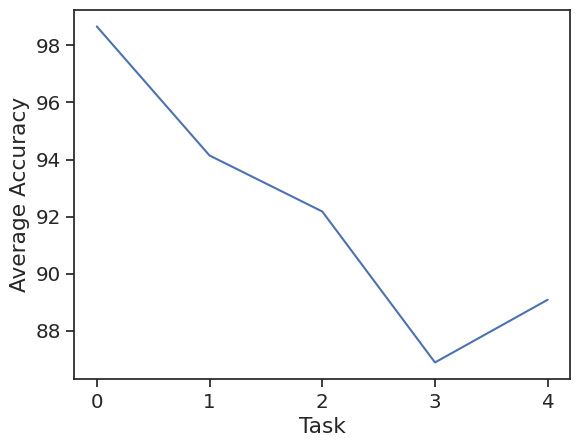

In [105]:
sns.lineplot( data_joint,  x='Task', y='Average Accuracy', ci=None)

In [106]:
data_joint.groupby(['Approach', 'Task']).mean().apply(lambda x: round(x, 2))

Average Accuracy  Average Forgetting
Approach Task                                      
Joint    0                98.67                 NaN
         1                94.14                4.42
         2                92.18                4.77
         3                86.88                6.51
         4                89.08                4.40

In [107]:
data_all = pd.concat([data, data_ewc, data_icarl, data_rere, data_joint, data_lwm], ignore_index=True)

/tmp/ipykernel_35340/4230112662.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.lineplot( data_all, hue='Approach', x='Task', y='Average Accuracy', hue_order=hue_order, ci=None)


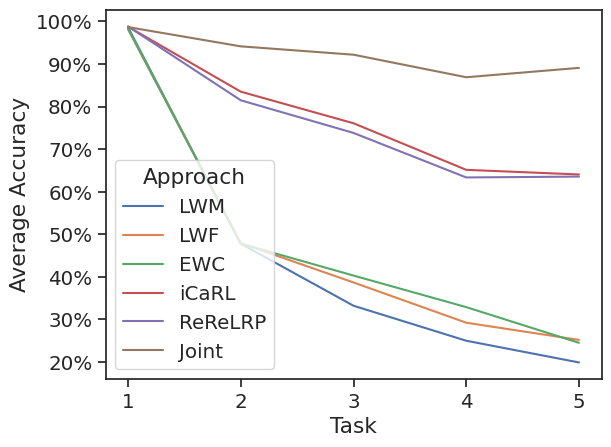

In [108]:
import matplotlib.pyplot as plt
hue_order = ["LWM", "LWF", "EWC", "iCaRL", "ReReLRP", "Joint"]
paletter = sns.color_palette("colorblind", 6)
sns.set_theme(style="ticks", font_scale=1.3) 
g = sns.lineplot( data_all, hue='Approach', x='Task', y='Average Accuracy', hue_order=hue_order, ci=None)
g.set_xticks(range(5))
g.set_xticklabels([i+1 for i in range(5)])
import matplotlib.ticker as mtick
g.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.savefig("fashionmnist.pdf", format='pdf', bbox_inches='tight')